# IDAES-GTEP Tutorial Notebook
### Presented & last updated 9/19/24

This notebook is intended as an introductory tutorial to using the IDAES-GTEP tool.  It walks through loading a small test case (PJM 5-bus) and solves expansion planning models with a few different assumptions on the network.  It demonstrates some basic result visualizations on the investment options and grid operations.

In [1]:
from gtep.gtep_model import ExpansionPlanningModel
from gtep.gtep_data import ExpansionPlanningData
from gtep.gtep_solution import ExpansionPlanningSolution
from pyomo.core import TransformationFactory
from pyomo.contrib.appsi.solvers.highs import Highs

'_BlockData'.  The class '_BlockData' has been renamed to 'BlockData'.
(deprecated in 6.7.2) (called from
c:\Users\ragarre\.conda\envs\3mldrd\lib\site-
packages\coramin\relaxations\relaxations_base.py:43)
expression symbols from pyomo.core.expr  (deprecated in 6.6.2) (called from
<frozen importlib._bootstrap>:228)
Interactive Python mode detected; using default matplotlib backend for plotting.


Loads default set of representative days -- #TODO allow non defaults by Tuesday

In [2]:
data_path = "./gtep/data/5bus"
data_object = ExpansionPlanningData()
data_object.load_prescient(data_path)

c:\Users\ragarre\.conda\envs\3mldrd\lib\site-packages\egret\parsers\rts_gmlc\parser.py:254: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(file_name,
c:\Users\ragarre\.conda\envs\3mldrd\lib\site-packages\egret\parsers\rts_gmlc\parser.py:254: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(file_name,
c:\Users\ragarre\.conda\envs\3mldrd\lib\site-packages\egret\parsers\rts_gmlc\parser.py:254: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(file_name,
c:\Users\ragarre\.conda\envs\3mldrd\lib\site-packages\egret\parsers\rts_gmlc\parser.py:254: FutureWarning: Support for nested sequences for 'pars

Builds expansion planning object but not specific model yet -- #TODO note issues that can occur with num_reps too large.  Also, make config overwrite these periods for the distinct times.

In [3]:
mod_object = ExpansionPlanningModel(
    stages=2,
    data=data_object.md,
    num_reps=1,
    len_reps=1,
    num_commit=24,
    num_dispatch=6,
)

In [4]:
mod_object.create_model()

[    0.00] Creating GTEP Model
(type=<class 'pyomo.core.base.var.ScalarVar'>) on block investmentStage[1]
with a new Component (type=<class
'pyomo.core.base.expression.ScalarExpression'>). This is usually indicative of
a modelling error. To avoid this warning, use block.del_component() and
block.add_component().
(type=<class 'pyomo.core.base.var.ScalarVar'>) on block investmentStage[2]
with a new Component (type=<class
'pyomo.core.base.expression.ScalarExpression'>). This is usually indicative of
a modelling error. To avoid this warning, use block.del_component() and
block.add_component().


In [5]:
TransformationFactory("gdp.bound_pretransformation").apply_to(mod_object.model)
TransformationFactory("gdp.bigm").apply_to(mod_object.model)

In [6]:
opt = Highs()
mod_object.results = opt.solve(mod_object.model)

#TODO -- demonstrate capabilities to save & load solution info

In [10]:
sol_object = ExpansionPlanningSolution()
sol_object.load_from_model(mod_object)
sol_object.dump_json("./gtep/gtep_solution.json")


In [11]:
sol_object.import_data_object(data_object)


[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out quotaDeficit from investmentStage[2], failed with error list index out of range. Skipping.
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out expansionCost from investmentStage[2], failed with error list index out of range. Skipping.
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out renewableCurtailmentInvestment from investmentStage[2], failed with error list index out of range. Skipping.
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out quotaDeficit from investmentStage[1], failed with error list index out of range. Skipping.
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out expansionCost from investmentStage[1], failed with error list index out of range. Skipping.
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out renewableCurtailmentInvestment from inv

d:\Local_Packages\3M LDRD\fork\idaes-gtep\gtep\gtep_solution.py:464: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_bins.set_yticklabels([None] + list(vars))
d:\Local_Packages\3M LDRD\fork\idaes-gtep\gtep\gtep_solution.py:495: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  tmp_rect = plt.Rectangle(


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Local_Packages\\3M LDRD\\fork\\idaes-gtep\\gtep\\plots\\investmentStage[2]_genDisabled,_genExtended,_genInstalled,_genOperational,_genRetired.png'

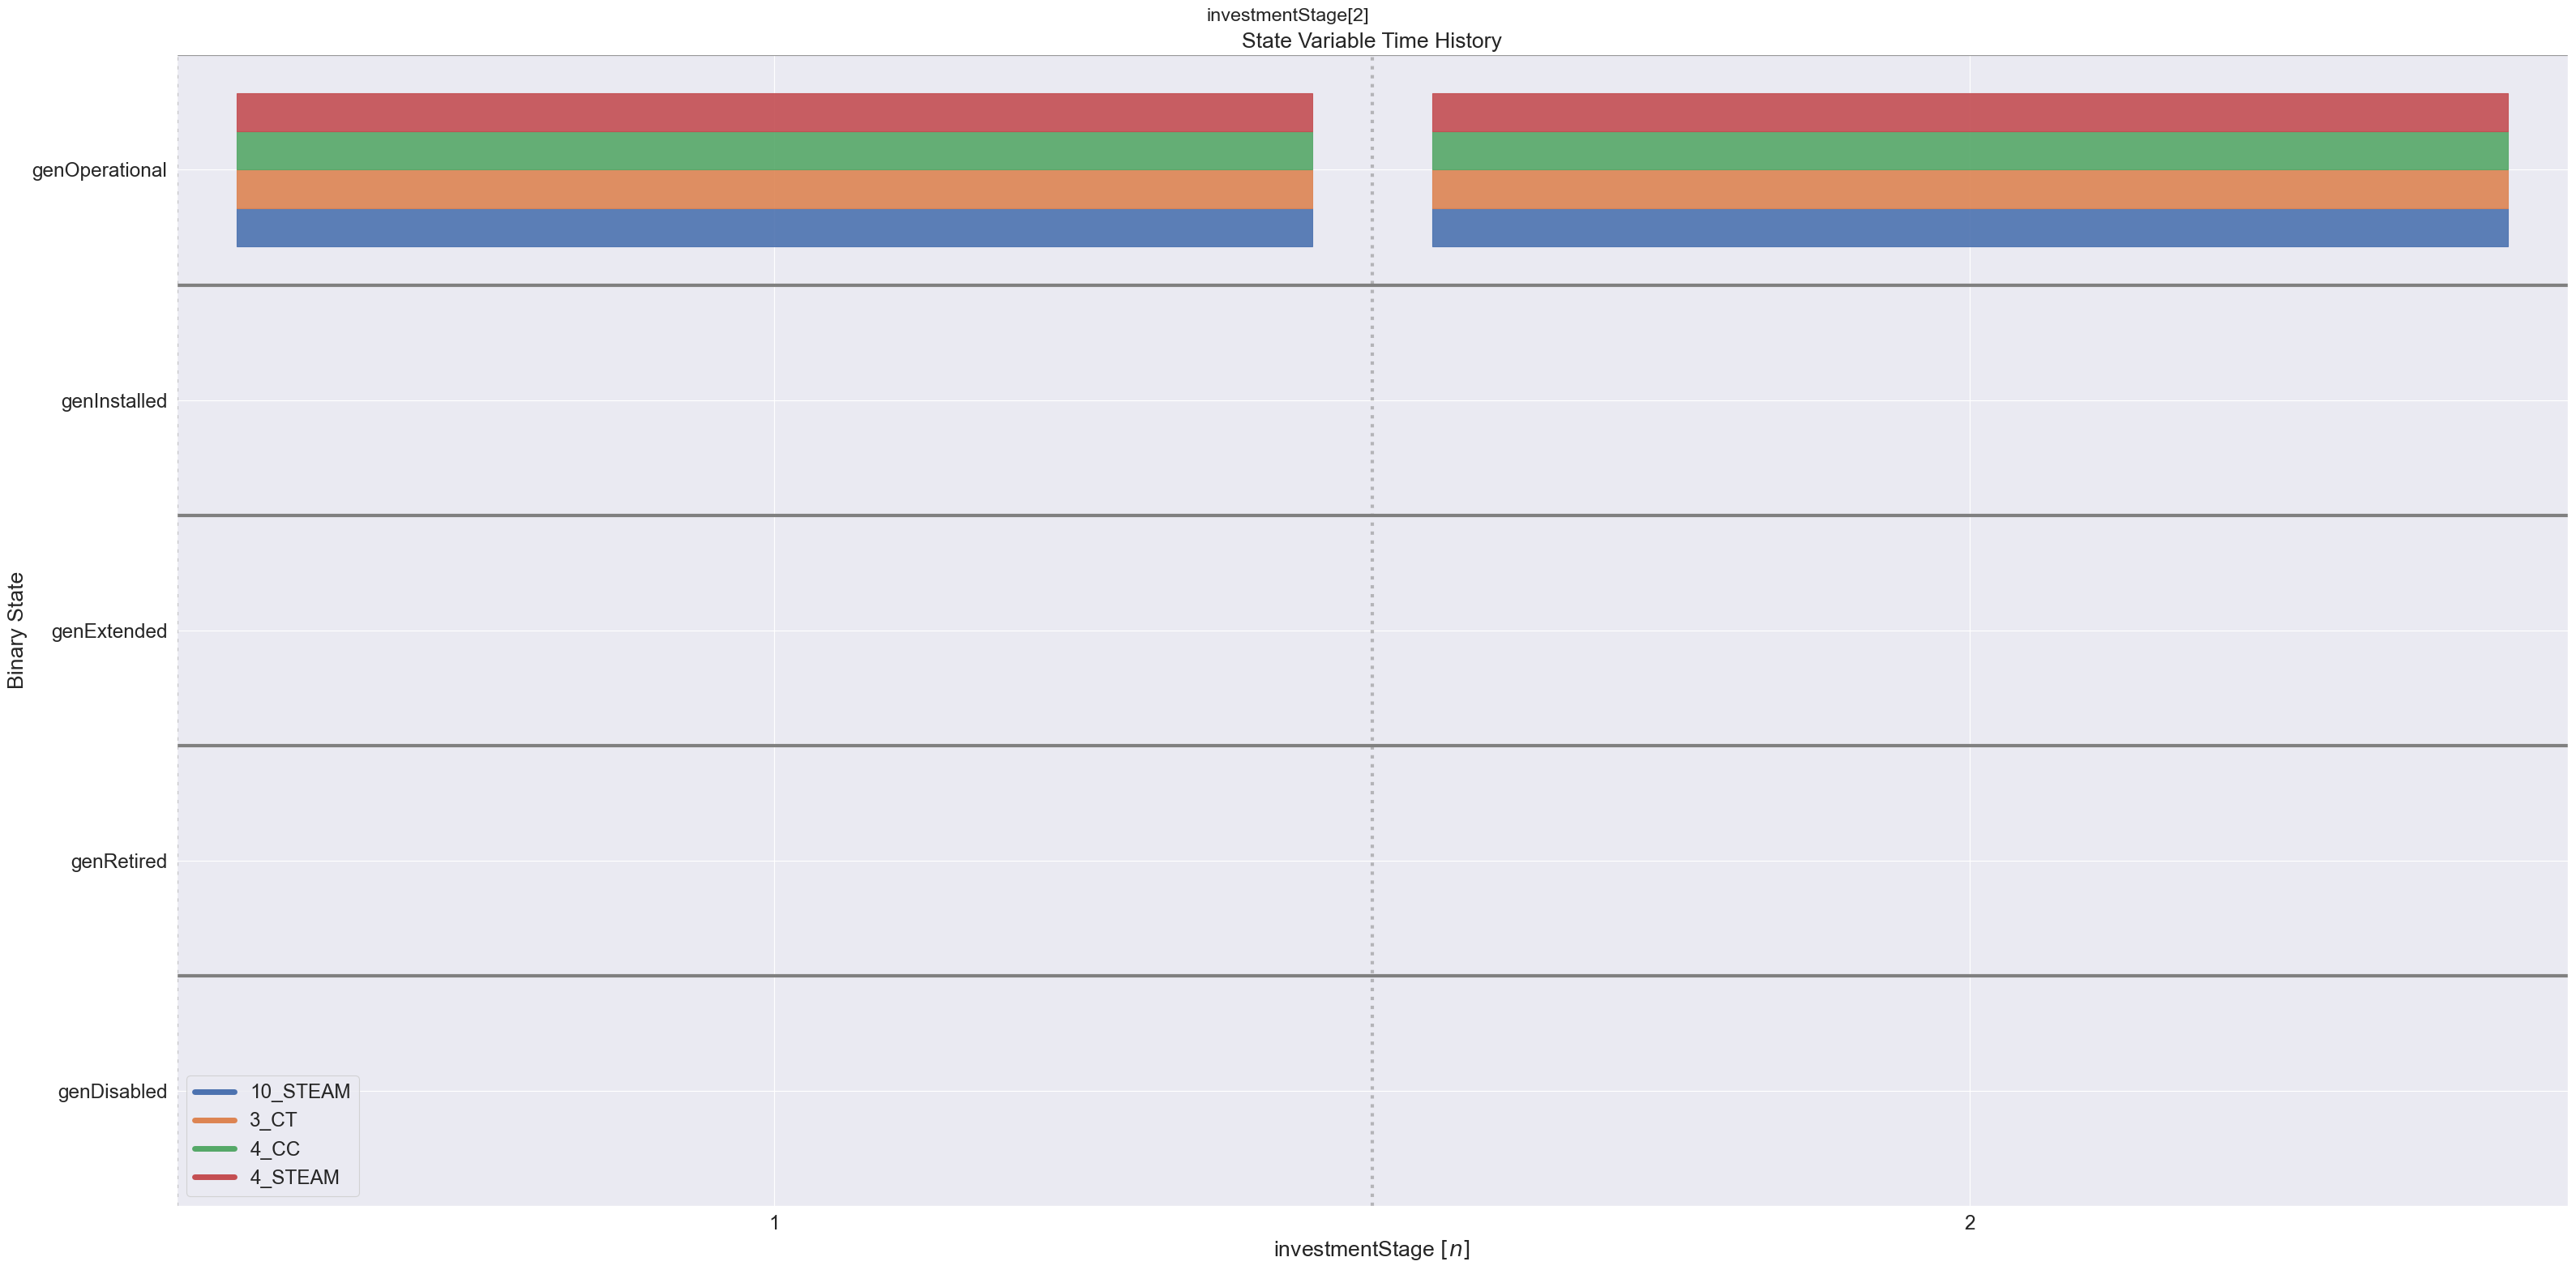

In [12]:
# TODO: add /gtep/plots if doesn't exist
sol_object.plot_levels(save_dir="./gtep/plots/")